# TAZ Summaries
This notebook imports TAZ data from the SFCTA in order to create a map to explore origin and destinations in SF.

In [693]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
pd.set_option('max_columns', 800)

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = 10, 8

# magic command to display matplotlib plots inline within the ipython notebook
%matplotlib inline

In [694]:
file_path = "../Data/dist16/trips_2012_dist16.csv"

In [695]:
df = pd.read_csv(file_path)

In [696]:
#cannot convert to float because there are problems with transit as an origin district for the following districts: N.Beach/Chinatown, Western Market, Mission/Portrero
df['vol'] = df['vol'].astype(float)

# Step 1
Create dataset of destinations by origin district by mode, time, and desination district.

In [697]:
data = df[['odist', 'ddist', 'mode', 'tp', 'vol']]

In [698]:
#create id field, a combination of mode, destination district, and time period. Necessary for reshape.
data['name'] = data['mode']+"_"+data['tp']+"_"+data['ddist'].astype(str)

/Users/briangoggin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [699]:
data = data[['odist', 'name', 'vol']]

In [700]:
data.head()

,odist,name,vol
0,1,bike_am_1,668.750
1,1,bike_ea_1,53.375
2,1,bike_ev_1,456.000
3,1,bike_md_1,1021.250
4,1,bike_pm_1,859.500


In [701]:
#reshape to wide format
data = data.pivot(index='odist',columns='name', values='vol')

In [702]:
#replace nans with 0s. I assume this means that there are no estimated trips.
data.fillna(value = 0, axis = 1, inplace = True)

In [703]:
data.head()

name,bike_am_1,bike_am_10,bike_am_11,bike_am_12,bike_am_13,bike_am_14,bike_am_15,bike_am_16,bike_am_2,bike_am_3,bike_am_4,bike_am_5,bike_am_6,bike_am_7,bike_am_8,bike_am_9,bike_ea_1,bike_ea_10,bike_ea_11,bike_ea_12,bike_ea_13,bike_ea_14,bike_ea_15,bike_ea_16,bike_ea_2,bike_ea_3,bike_ea_4,bike_ea_5,bike_ea_6,bike_ea_7,bike_ea_8,bike_ea_9,bike_ev_1,bike_ev_10,bike_ev_11,bike_ev_12,bike_ev_13,bike_ev_14,bike_ev_15,bike_ev_16,bike_ev_2,bike_ev_3,bike_ev_4,bike_ev_5,bike_ev_6,bike_ev_7,bike_ev_8,bike_ev_9,bike_md_1,bike_md_10,bike_md_11,bike_md_12,bike_md_13,bike_md_14,bike_md_15,bike_md_16,bike_md_2,bike_md_3,bike_md_4,bike_md_5,bike_md_6,bike_md_7,bike_md_8,bike_md_9,bike_pm_1,bike_pm_10,bike_pm_11,bike_pm_12,bike_pm_13,bike_pm_14,bike_pm_15,bike_pm_16,bike_pm_2,bike_pm_3,bike_pm_4,bike_pm_5,bike_pm_6,bike_pm_7,bike_pm_8,bike_pm_9,drive_alone_am_1,drive_alone_am_10,drive_alone_am_11,drive_alone_am_12,drive_alone_am_13,drive_alone_am_14,drive_alone_am_15,drive_alone_am_16,drive_alone_am_17,drive_alone_am_2,drive_alone_am_3,drive_alone_am_4,drive_alone_am_5,drive_alone_am_6,drive_alone_am_7,drive_alone_am_8,drive_alone_am_9,drive_alone_ea_1,drive_alone_ea_10,drive_alone_ea_11,drive_alone_ea_12,drive_alone_ea_13,drive_alone_ea_14,drive_alone_ea_15,drive_alone_ea_16,drive_alone_ea_17,drive_alone_ea_2,drive_alone_ea_3,drive_alone_ea_4,drive_alone_ea_5,drive_alone_ea_6,drive_alone_ea_7,drive_alone_ea_8,drive_alone_ea_9,drive_alone_ev_1,drive_alone_ev_10,drive_alone_ev_11,drive_alone_ev_12,drive_alone_ev_13,drive_alone_ev_14,drive_alone_ev_15,drive_alone_ev_16,drive_alone_ev_17,drive_alone_ev_2,drive_alone_ev_3,drive_alone_ev_4,drive_alone_ev_5,drive_alone_ev_6,drive_alone_ev_7,drive_alone_ev_8,drive_alone_ev_9,drive_alone_md_1,drive_alone_md_10,drive_alone_md_11,drive_alone_md_12,drive_alone_md_13,drive_alone_md_14,drive_alone_md_15,drive_alone_md_16,drive_alone_md_17,drive_alone_md_2,drive_alone_md_3,drive_alone_md_4,drive_alone_md_5,drive_alone_md_6,drive_alone_md_7,drive_alone_md_8,drive_alone_md_9,drive_alone_pm_1,drive_alone_pm_10,drive_alone_pm_11,drive_alone_pm_12,drive_alone_pm_13,drive_alone_pm_14,drive_alone_pm_15,drive_alone_pm_16,drive_alone_pm_17,drive_alone_pm_2,drive_alone_pm_3,drive_alone_pm_4,drive_alone_pm_5,drive_alone_pm_6,drive_alone_pm_7,drive_alone_pm_8,drive_alone_pm_9,shared_ride_2_am_1,shared_ride_2_am_10,shared_ride_2_am_11,shared_ride_2_am_12,shared_ride_2_am_13,shared_ride_2_am_14,shared_ride_2_am_15,shared_ride_2_am_16,shared_ride_2_am_17,shared_ride_2_am_2,shared_ride_2_am_3,shared_ride_2_am_4,shared_ride_2_am_5,shared_ride_2_am_6,shared_ride_2_am_7,shared_ride_2_am_8,shared_ride_2_am_9,shared_ride_2_ea_1,shared_ride_2_ea_10,shared_ride_2_ea_11,shared_ride_2_ea_12,shared_ride_2_ea_13,shared_ride_2_ea_14,shared_ride_2_ea_15,shared_ride_2_ea_16,shared_ride_2_ea_17,shared_ride_2_ea_2,shared_ride_2_ea_3,shared_ride_2_ea_4,shared_ride_2_ea_5,shared_ride_2_ea_6,shared_ride_2_ea_7,shared_ride_2_ea_8,shared_ride_2_ea_9,shared_ride_2_ev_1,shared_ride_2_ev_10,shared_ride_2_ev_11,shared_ride_2_ev_12,shared_ride_2_ev_13,shared_ride_2_ev_14,shared_ride_2_ev_15,shared_ride_2_ev_16,shared_ride_2_ev_17,shared_ride_2_ev_2,shared_ride_2_ev_3,shared_ride_2_ev_4,shared_ride_2_ev_5,shared_ride_2_ev_6,shared_ride_2_ev_7,shared_ride_2_ev_8,shared_ride_2_ev_9,shared_ride_2_md_1,shared_ride_2_md_10,shared_ride_2_md_11,shared_ride_2_md_12,shared_ride_2_md_13,shared_ride_2_md_14,shared_ride_2_md_15,shared_ride_2_md_16,shared_ride_2_md_17,shared_ride_2_md_2,shared_ride_2_md_3,shared_ride_2_md_4,shared_ride_2_md_5,shared_ride_2_md_6,shared_ride_2_md_7,shared_ride_2_md_8,shared_ride_2_md_9,shared_ride_2_pm_1,shared_ride_2_pm_10,shared_ride_2_pm_11,shared_ride_2_pm_12,shared_ride_2_pm_13,shared_ride_2_pm_14,shared_ride_2_pm_15,shared_ride_2_pm_16,shared_ride_2_pm_17,shared_ride_2_pm_2,shared_ride_2_pm_3,shared_ride_2_pm_4,shared_ride_2_pm_5,shared_ride_2_pm_6,shared_ride_2_pm_7,shared_ride_2_pm_8,shared_ride_2_pm_9,shared_ride_3_am_1,s

In [704]:
#Create mode-time totals
#round all numbers to the hundredth place
times = ['am', 'ea', 'ev', 'md', 'pm']
modes = ['bike', 'drive_alone', 'shared_ride_2', 'shared_ride_3', 'taxi', 'transit', 'truck', 'walk']
numbers = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']

In [705]:
#fill out columns for all modes and times to make sure they have 1-17. If not, make column of 0s.
for t in times:
    for m in modes:
        for n in numbers:
            if m+'_'+t+'_'+n not in data:
                data[m+'_'+t+'_'+n]= 0 #fill out with 0s if this column does not exist

In [706]:
#Create all and drive categories (sums of other categories)

#first, all category
for t in times:
    for n in numbers:
        data['all'+'_'+t+'_'+n] = 0
        for m in modes:
            data['all'+'_'+t+'_'+n]+=data[m+'_'+t+'_'+n]

drivemodes=['drive_alone', 'shared_ride_2', 'shared_ride_3','taxi', 'truck']

#second, drive category
for t in times:
    for n in numbers:
        data['drive'+'_'+t+'_'+n] = 0
        for m in drivemodes:
            data['drive'+'_'+t+'_'+n]+=data[m+'_'+t+'_'+n]


In [707]:
#add 'all' and 'drive' categories to mode list
modes = ['all', 'drive', 'bike', 'drive_alone', 'shared_ride_2', 'shared_ride_3', 'taxi', 'transit', 'truck', 'walk']

#create sum columns for mode and times
for t in times:
    for m in modes:
        data[m+'_'+t]=data[m+'_'+t+'_'+'1']+data[m+'_'+t+'_'+'2']+data[m+'_'+t+'_'+'3']+data[m+'_'+t+'_'+'4']+data[m+'_'+t+'_'+'5']+data[m+'_'+t+'_'+'6']+data[m+'_'+t+'_'+'7']+data[m+'_'+t+'_'+'8']+data[m+'_'+t+'_'+'9']+data[m+'_'+t+'_'+'10']+data[m+'_'+t+'_'+'11']+data[m+'_'+t+'_'+'12']+data[m+'_'+t+'_'+'13']+data[m+'_'+t+'_'+'14']+data[m+'_'+t+'_'+'15']+data[m+'_'+t+'_'+'16']+data[m+'_'+t+'_'+'17']

In [708]:
#create percentage of all mode-time trips for each origin
for t in times:
    for m in modes:
        data[m+'_'+t+'_sum'] = round(data[m+'_'+t].sum(),0)
        data[m+'_'+t+'_'+'pct']=(data[m+'_'+t]/data[m+'_'+t].sum())*100

In [709]:
#create columns for percentages of each mode-time trips for each destination district
#fill out columns for all modes and times to make sure they have 1-17. If not, make column of 0s.
for t in times:
    for m in modes:
        for n in numbers:
            data[m+'_'+t+'_'+n+'_'+'pct']=(data[m+'_'+t+'_'+n]/data[m+'_'+t])*100

In [710]:
#check to make sure math is correct
data[['drive_am', 'drive_am_1', 'drive_am_1_pct']]

name,drive_am,drive_am_1,drive_am_1_pct
odist,,,
1,3.105671e+04,9238.209918,29.746257
2,1.084124e+04,2569.510980,23.701262
3,1.737667e+04,5209.737430,29.981216
4,2.112551e+04,2788.877538,13.201467
5,1.979664e+04,2510.156562,12.679708
6,1.509184e+04,1028.223288,6.813110
7,1.919114e+04,3367.601934,17.547692
8,1.752608e+04,1860.574244,10.616030
9,2.111784e+04,1867.968904,8.845455


In [711]:
data.shape

(17, 1850)

In [712]:
#finally, drop all person-trip-number columns. All we want is percentages for final geojson.
for t in times:
    for m in modes:
        for n in numbers:
            data.drop(m+'_'+t+'_'+n, axis=1, inplace=True)
            
#round person trip figures
for t in times:
    for m in modes:
        data[m+'_'+t] = round(data[m+'_'+t], 0)

In [713]:
data.shape

(17, 1000)

# Step 2.
Create percentage of total person trips in each district-time period

In [714]:
dfo = df.groupby(['odist', 'mode', 'tp'], as_index=False)['vol'].agg('sum')

In [715]:
dfo.head()

,odist,mode,tp,vol
0,1,bike,am,2024.250
1,1,bike,ea,141.500
2,1,bike,ev,4373.500
3,1,bike,md,4947.125
4,1,bike,pm,7071.125


In [716]:
times = ['am', 'ea', 'ev', 'md', 'pm']
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
drivemodes=['drive_alone', 'shared_ride_2', 'shared_ride_3','taxi', 'truck']


#create "all" category
for n in numbers:
    for t in times:
        value_sum = dfo[(dfo['odist']==n) & (dfo['tp']==t)]['vol'].sum()
        #print(value_sum)
        newrow = pd.DataFrame([[n, 'all', t, value_sum]], columns=dfo.columns)
        dfo = dfo.append(newrow)

#create aggregate "drive" category
for n in numbers:
    for t in times:
        value_sum = dfo[(dfo['odist']==n) & (dfo['tp']==t) & (dfo['mode'].isin(drivemodes))]['vol'].sum()
        #print(value_sum)
        newrow = pd.DataFrame([[n, 'drive', t, value_sum]], columns=dfo.columns)
        dfo = dfo.append(newrow)


In [717]:
totals = df.groupby(['odist', 'tp'], as_index=False)['vol'].agg('sum')

In [718]:
totals.head()

,odist,tp,vol
0,1,am,73395.672303
1,1,ea,10327.643763
2,1,ev,162004.277697
3,1,md,324170.331372
4,1,pm,202331.013688


In [719]:
#created merged dataframe
merged = dfo.merge(totals, how='inner', left_on=['odist', 'tp'], right_on=['odist', 'tp'])

In [720]:
merged.head()

,odist,mode,tp,vol_x,vol_y
0,1,bike,am,2024.250000,73395.672303
1,1,drive_alone,am,11976.172850,73395.672303
2,1,shared_ride_2,am,1322.792442,73395.672303
3,1,shared_ride_3,am,435.153621,73395.672303
4,1,taxi,am,594.125000,73395.672303


In [721]:
merged['name']=merged['mode']+"_"+merged['tp']

In [722]:
# Rename variables. ptm = "person trips mode". ptt = "person trips total"
merged = merged.rename(columns={"vol_x": "ptm", "vol_y": "ptt"})

In [723]:
merged['pct']=(merged['ptm']/merged['ptt'])*100

In [724]:
#reshape to wide format
data2 = merged.copy()
data2['name']=data2['name']+'_perc'
data2 = data2.pivot(index='odist',columns='name', values='pct')

In [725]:
#create dataframe of person trips by time and mode to merge in
data3 = merged.copy()
data3['name']=data3['name']+'_ptm'
data3 = data3.pivot(index='odist', columns='name', values='ptm')

In [726]:
#create dataframe of total person trips by time  to merge in
data4 = merged.copy()
data4['name']=data4['name']+'_ptt'
data4 = data4.pivot(index='odist', columns='name', values='ptt')

In [727]:
#round all numbers to the nearest integer
for t in times:
    for m in modes:
        data3[m+'_'+t+'_'+'ptm'] = round(data3[m+'_'+t+'_'+'ptm'], 0)
        data4[m+'_'+t+'_'+'ptt'] = round(data4[m+'_'+t+'_'+'ptt'], 0)

In [728]:
data2 = data2.merge(data3, how='inner', left_index = True, right_index=True)

In [729]:
data2 = data2.merge(data4, how='inner', left_index = True, right_index=True)

In [730]:
#data2.head()

# Step 3.
Import Shapefile of Districts

In [731]:
filepath = "../Data/dist16/Dist_16_Dissolve.shp"
TAZs = gpd.read_file(filepath)

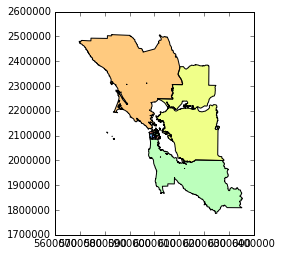

In [732]:
#TAZs.crs = {'init' :'epsg:4326'} #set projection
TAZs.plot()

In [733]:
TAZs.head()

,DIST,DISTNAME,FULLNAME,OBJECTID,Shape_Area,Shape_Leng,geometry
0,1.0,Downtown,Downtown,1,3.482649e+07,33926.595772,"POLYGON ((6014725.000174835 2118354.749827594,..."
1,2.0,SoMa,SoMa,2,3.980157e+07,80130.281802,(POLYGON ((6032225.627903178 2114620.192008004...
2,3.0,N.Beach/,N. Beach/Chinatown,3,4.764233e+07,91608.410582,(POLYGON ((6009991.000128418 2122816.000747591...
3,4.0,Western,Western Market,4,8.104781e+07,44643.613030,"POLYGON ((6006487.000574753 2114077.000509083,..."
4,5.0,Mission/,Mission/Potrero,5,1.095278e+08,89862.310635,"POLYGON ((6014737.500149846 2110230.75098376, ..."


# Step 4. 
Merge and Export

In [734]:
final = TAZs.merge(data2, how='inner', left_on=['DIST'], right_index=True) #merge mode percentages from step 2. 

In [735]:
final.shape

(16, 157)

In [736]:
final = final.merge(data, how='inner', left_on=['DIST'], right_index=True) #merge destination percentages from step 1.

In [737]:
final.shape

(16, 1157)

In [738]:
final.head()

,DIST,DISTNAME,FULLNAME,OBJECTID,Shape_Area,Shape_Leng,geometry,all_am_perc,all_ea_perc,all_ev_perc,all_md_perc,all_pm_perc,bike_am_perc,bike_ea_perc,bike_ev_perc,bike_md_perc,bike_pm_perc,drive_alone_am_perc,drive_alone_ea_perc,drive_alone_ev_perc,drive_alone_md_perc,drive_alone_pm_perc,drive_am_perc,drive_ea_perc,drive_ev_perc,drive_md_perc,drive_pm_perc,shared_ride_2_am_perc,shared_ride_2_ea_perc,shared_ride_2_ev_perc,shared_ride_2_md_perc,shared_ride_2_pm_perc,shared_ride_3_am_perc,shared_ride_3_ea_perc,shared_ride_3_ev_perc,shared_ride_3_md_perc,shared_ride_3_pm_perc,taxi_am_perc,taxi_ea_perc,taxi_ev_perc,taxi_md_perc,taxi_pm_perc,transit_am_perc,transit_ea_perc,transit_ev_perc,transit_md_perc,transit_pm_perc,truck_am_perc,truck_ea_perc,truck_ev_perc,truck_md_perc,truck_pm_perc,walk_am_perc,walk_ea_perc,walk_ev_perc,walk_md_perc,walk_pm_perc,all_am_ptm,all_ea_ptm,all_ev_ptm,all_md_ptm,all_pm_ptm,bike_am_ptm,bike_ea_ptm,bike_ev_ptm,bike_md_ptm,bike_pm_ptm,drive_alone_am_ptm,drive_alone_ea_ptm,drive_alone_ev_ptm,drive_alone_md_ptm,drive_alone_pm_ptm,drive_am_ptm,drive_ea_ptm,drive_ev_ptm,drive_md_ptm,drive_pm_ptm,shared_ride_2_am_ptm,shared_ride_2_ea_ptm,shared_ride_2_ev_ptm,shared_ride_2_md_ptm,shared_ride_2_pm_ptm,shared_ride_3_am_ptm,shared_ride_3_ea_ptm,shared_ride_3_ev_ptm,shared_ride_3_md_ptm,shared_ride_3_pm_ptm,taxi_am_ptm,taxi_ea_ptm,taxi_ev_ptm,taxi_md_ptm,taxi_pm_ptm,transit_am_ptm,transit_ea_ptm,transit_ev_ptm,transit_md_ptm,transit_pm_ptm,truck_am_ptm,truck_ea_ptm,truck_ev_ptm,truck_md_ptm,truck_pm_ptm,walk_am_ptm,walk_ea_ptm,walk_ev_ptm,walk_md_ptm,walk_pm_ptm,all_am_ptt,all_ea_ptt,all_ev_ptt,all_md_ptt,all_pm_ptt,bike_am_ptt,bike_ea_ptt,bike_ev_ptt,bike_md_ptt,bike_pm_ptt,drive_alone_am_ptt,drive_alone_ea_ptt,drive_alone_ev_ptt,drive_alone_md_ptt,drive_alone_pm_ptt,drive_am_ptt,drive_ea_ptt,drive_ev_ptt,drive_md_ptt,drive_pm_ptt,shared_ride_2_am_ptt,shared_ride_2_ea_ptt,shared_ride_2_ev_ptt,shared_ride_2_md_ptt,shared_ride_2_pm_ptt,shared_ride_3_am_ptt,shared_ride_3_ea_ptt,shared_ride_3_ev_ptt,shared_ride_3_md_ptt,shared_ride_3_pm_ptt,taxi_am_ptt,taxi_ea_ptt,taxi_ev_ptt,taxi_md_ptt,taxi_pm_ptt,transit_am_ptt,transit_ea_ptt,transit_ev_ptt,transit_md_ptt,transit_pm_ptt,truck_am_ptt,truck_ea_ptt,truck_ev_ptt,truck_md_ptt,truck_pm_ptt,walk_am_ptt,walk_ea_ptt,walk_ev_ptt,walk_md_ptt,walk_pm_ptt,all_am,drive_am,bike_am,drive_alone_am,shared_ride_2_am,shared_ride_3_am,taxi_am,transit_am,truck_am,walk_am,all_ea,drive_ea,bike_ea,drive_alone_ea,shared_ride_2_ea,shared_ride_3_ea,taxi_ea,transit_ea,truck_ea,walk_ea,all_ev,drive_ev,bike_ev,drive_alone_ev,shared_ride_2_ev,shared_ride_3_ev,taxi_ev,transit_ev,truck_ev,walk_ev,all_md,drive_md,bike_md,drive_alone_md,shared_ride_2_md,shared_ride_3_md,taxi_md,transit_md,truck_md,walk_md,all_pm,drive_pm,bike_pm,drive_alone_pm,shared_ride_2_pm,shared_ride_3_pm,taxi_pm,transit_pm,truck_pm,walk_pm,all_am_sum,all_am_pct,drive_am_sum,drive_am_pct,bike_am_sum,bike_am_pct,drive_alone_am_sum,drive_alone_am_pct,shared_ride_2_am_sum,shared_ride_2_am_pct,shared_ride_3_am_sum,shared_ride_3_am_pct,taxi_am_sum,taxi_am_pct,transit_am_sum,transit_am_pct,truck_am_sum,truck_am_pct,walk_am_sum,walk_am_pct,all_ea_sum,all_ea_pct,drive_ea_sum,drive_ea_pct,bike_ea_sum,bike_ea_pct,drive_alone_ea_sum,drive_alone_ea_pct,shared_ride_2_ea_sum,shared_ride_2_ea_pct,shared_ride_3_ea_sum,shared_ride_3_ea_pct,taxi_ea_sum,taxi_ea_pct,transit_ea_sum,transit_ea_pct,truck_ea_sum,truck_ea_pct,walk_ea_sum,walk_ea_pct,all_ev_sum,all_ev_pct,drive_ev_sum,drive_ev_pct,bike_ev_sum,bike_ev_pct,drive_alone_ev_sum,drive_alone_ev_pct,shared_ride_2_ev_sum,shared_ride_2_ev_pct,shared_ride_3_ev_sum,shared_ride_3_ev_pct,taxi_ev_sum,taxi_ev_pct,transit_ev_sum,transit_ev_pct,truck_ev_sum,truck_ev_pct,walk_ev_sum,walk_ev_pct,all_md_sum,all_md_pct,drive_md_sum,drive_md_pct,bike_md_sum,bike_md_pct,drive_alone_md_sum,drive_alone_md_pct,shared_ride_2_md_sum,shared_ride_2_md_pct,shared_ride_3_md_sum,shared_ride_3_md_pct,taxi_md_sum,taxi_m

In [739]:
final = final.to_crs({'init': 'epsg:4326'}) 

In [740]:
#change numbers back to strings
numbers = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']

#round all percentages to the nearest integer
for t in times:
    for m in modes:
        final[m+'_'+t+'_'+'perc'] = round(final[m+'_'+t+'_'+'perc'], 1)
        final[m+'_'+t+'_'+'pct'] = round(final[m+'_'+t+'_'+'pct'], 1)
        
for t in times:
    for m in modes:
        for n in numbers:
            final[m+'_'+t+'_'+n+'_'+'pct'] = round(final[m+'_'+t+'_'+n+'_'+'pct'], 1)

In [741]:
final.head(17)

,DIST,DISTNAME,FULLNAME,OBJECTID,Shape_Area,Shape_Leng,geometry,all_am_perc,all_ea_perc,all_ev_perc,all_md_perc,all_pm_perc,bike_am_perc,bike_ea_perc,bike_ev_perc,bike_md_perc,bike_pm_perc,drive_alone_am_perc,drive_alone_ea_perc,drive_alone_ev_perc,drive_alone_md_perc,drive_alone_pm_perc,drive_am_perc,drive_ea_perc,drive_ev_perc,drive_md_perc,drive_pm_perc,shared_ride_2_am_perc,shared_ride_2_ea_perc,shared_ride_2_ev_perc,shared_ride_2_md_perc,shared_ride_2_pm_perc,shared_ride_3_am_perc,shared_ride_3_ea_perc,shared_ride_3_ev_perc,shared_ride_3_md_perc,shared_ride_3_pm_perc,taxi_am_perc,taxi_ea_perc,taxi_ev_perc,taxi_md_perc,taxi_pm_perc,transit_am_perc,transit_ea_perc,transit_ev_perc,transit_md_perc,transit_pm_perc,truck_am_perc,truck_ea_perc,truck_ev_perc,truck_md_perc,truck_pm_perc,walk_am_perc,walk_ea_perc,walk_ev_perc,walk_md_perc,walk_pm_perc,all_am_ptm,all_ea_ptm,all_ev_ptm,all_md_ptm,all_pm_ptm,bike_am_ptm,bike_ea_ptm,bike_ev_ptm,bike_md_ptm,bike_pm_ptm,drive_alone_am_ptm,drive_alone_ea_ptm,drive_alone_ev_ptm,drive_alone_md_ptm,drive_alone_pm_ptm,drive_am_ptm,drive_ea_ptm,drive_ev_ptm,drive_md_ptm,drive_pm_ptm,shared_ride_2_am_ptm,shared_ride_2_ea_ptm,shared_ride_2_ev_ptm,shared_ride_2_md_ptm,shared_ride_2_pm_ptm,shared_ride_3_am_ptm,shared_ride_3_ea_ptm,shared_ride_3_ev_ptm,shared_ride_3_md_ptm,shared_ride_3_pm_ptm,taxi_am_ptm,taxi_ea_ptm,taxi_ev_ptm,taxi_md_ptm,taxi_pm_ptm,transit_am_ptm,transit_ea_ptm,transit_ev_ptm,transit_md_ptm,transit_pm_ptm,truck_am_ptm,truck_ea_ptm,truck_ev_ptm,truck_md_ptm,truck_pm_ptm,walk_am_ptm,walk_ea_ptm,walk_ev_ptm,walk_md_ptm,walk_pm_ptm,all_am_ptt,all_ea_ptt,all_ev_ptt,all_md_ptt,all_pm_ptt,bike_am_ptt,bike_ea_ptt,bike_ev_ptt,bike_md_ptt,bike_pm_ptt,drive_alone_am_ptt,drive_alone_ea_ptt,drive_alone_ev_ptt,drive_alone_md_ptt,drive_alone_pm_ptt,drive_am_ptt,drive_ea_ptt,drive_ev_ptt,drive_md_ptt,drive_pm_ptt,shared_ride_2_am_ptt,shared_ride_2_ea_ptt,shared_ride_2_ev_ptt,shared_ride_2_md_ptt,shared_ride_2_pm_ptt,shared_ride_3_am_ptt,shared_ride_3_ea_ptt,shared_ride_3_ev_ptt,shared_ride_3_md_ptt,shared_ride_3_pm_ptt,taxi_am_ptt,taxi_ea_ptt,taxi_ev_ptt,taxi_md_ptt,taxi_pm_ptt,transit_am_ptt,transit_ea_ptt,transit_ev_ptt,transit_md_ptt,transit_pm_ptt,truck_am_ptt,truck_ea_ptt,truck_ev_ptt,truck_md_ptt,truck_pm_ptt,walk_am_ptt,walk_ea_ptt,walk_ev_ptt,walk_md_ptt,walk_pm_ptt,all_am,drive_am,bike_am,drive_alone_am,shared_ride_2_am,shared_ride_3_am,taxi_am,transit_am,truck_am,walk_am,all_ea,drive_ea,bike_ea,drive_alone_ea,shared_ride_2_ea,shared_ride_3_ea,taxi_ea,transit_ea,truck_ea,walk_ea,all_ev,drive_ev,bike_ev,drive_alone_ev,shared_ride_2_ev,shared_ride_3_ev,taxi_ev,transit_ev,truck_ev,walk_ev,all_md,drive_md,bike_md,drive_alone_md,shared_ride_2_md,shared_ride_3_md,taxi_md,transit_md,truck_md,walk_md,all_pm,drive_pm,bike_pm,drive_alone_pm,shared_ride_2_pm,shared_ride_3_pm,taxi_pm,transit_pm,truck_pm,walk_pm,all_am_sum,all_am_pct,drive_am_sum,drive_am_pct,bike_am_sum,bike_am_pct,drive_alone_am_sum,drive_alone_am_pct,shared_ride_2_am_sum,shared_ride_2_am_pct,shared_ride_3_am_sum,shared_ride_3_am_pct,taxi_am_sum,taxi_am_pct,transit_am_sum,transit_am_pct,truck_am_sum,truck_am_pct,walk_am_sum,walk_am_pct,all_ea_sum,all_ea_pct,drive_ea_sum,drive_ea_pct,bike_ea_sum,bike_ea_pct,drive_alone_ea_sum,drive_alone_ea_pct,shared_ride_2_ea_sum,shared_ride_2_ea_pct,shared_ride_3_ea_sum,shared_ride_3_ea_pct,taxi_ea_sum,taxi_ea_pct,transit_ea_sum,transit_ea_pct,truck_ea_sum,truck_ea_pct,walk_ea_sum,walk_ea_pct,all_ev_sum,all_ev_pct,drive_ev_sum,drive_ev_pct,bike_ev_sum,bike_ev_pct,drive_alone_ev_sum,drive_alone_ev_pct,shared_ride_2_ev_sum,shared_ride_2_ev_pct,shared_ride_3_ev_sum,shared_ride_3_ev_pct,taxi_ev_sum,taxi_ev_pct,transit_ev_sum,transit_ev_pct,truck_ev_sum,truck_ev_pct,walk_ev_sum,walk_ev_pct,all_md_sum,all_md_pct,drive_md_sum,drive_md_pct,bike_md_sum,bike_md_pct,drive_alone_md_sum,drive_alone_md_pct,shared_ride_2_md_sum,shared_ride_2_md_pct,shared_ride_3_md_sum,shared_ride_3_md_pct,taxi_md_sum,taxi_m

In [742]:
final[['bike_am_pct', 'drive_alone_am_pct', 'FULLNAME']].head(17)

,bike_am_pct,drive_alone_am_pct,FULLNAME
0,1.9,0.6,Downtown
1,1.1,0.2,SoMa
2,2.0,0.4,N. Beach/Chinatown
3,4.0,0.6,Western Market
4,3.9,0.5,Mission/Potrero
5,1.5,0.5,Noe/Glen/Bernal
6,2.9,0.5,Marina/N. Heights
7,2.7,0.5,Richmond
8,1.3,0.6,Bayshore
9,1.2,0.7,Outer Mission


In [743]:
#finally, drop unnecessary column
final.drop('DISTNAME', axis=1, inplace=True)

In [744]:
export_path = "../TAZ_Map/"
with open(export_path+'taz_output.js', 'w') as f:
    f.write('var dataset = {};'.format(final.to_json()))